INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                        ds          y
195884 2023-04-13 13:29:00  11.710300
195885 2023-04-13 13:30:00  11.787902
195886 2023-04-13 13:31:00  11.832978
195887 2023-04-13 13:32:00  11.819380
195888 2023-04-13 13:33:00  11.782113


DEBUG:cmdstanpy:input tempfile: /tmp/tmpmvd21kx4/e7c7r404.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmvd21kx4/kgwvn60q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20125', 'data', 'file=/tmp/tmpmvd21kx4/e7c7r404.json', 'init=/tmp/tmpmvd21kx4/kgwvn60q.json', 'output', 'file=/tmp/tmpmvd21kx4/prophet_model439y6g43/prophet_model-20230516162454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:24:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:30:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


time required for training
363.9725708149999
0.45518863100005547
0      2023-05-16 00:00:00
1      2023-05-16 00:01:00
2      2023-05-16 00:02:00
3      2023-05-16 00:03:00
4      2023-05-16 00:04:00
               ...        
1435   2023-05-16 23:55:00
1436   2023-05-16 23:56:00
1437   2023-05-16 23:57:00
1438   2023-05-16 23:58:00
1439   2023-05-16 23:59:00
Name: date, Length: 1440, dtype: datetime64[ns]


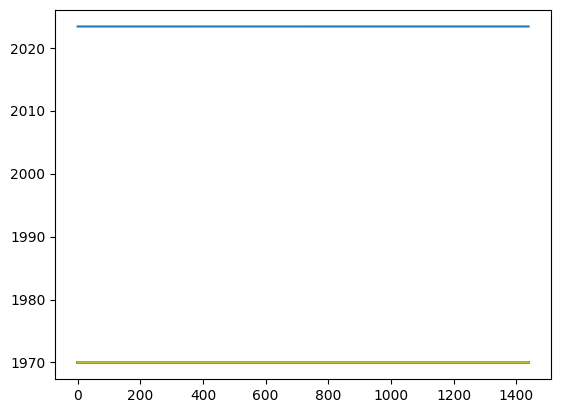

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Apr 13 15:03:36 2023

@author: chandra
"""

import pandas as pd
import numpy as np
from matplotlib import pyplot
from prophet.serialize import model_to_json, model_from_json
from prophet import Prophet
from timeit import default_timer as timer
import warnings
from datetime import date


df = pd.read_excel(r'/content/LT Meter Data.xlsx') # path for the input excel file

# the below code is for data preprocessing

data = df.sort_values(by = 'DATE', ignore_index=True)
fd = data
data=fd[['DATE', 'voltage_status']]
fd['date']=pd.to_datetime(fd['DATE'])
data=data.set_index(fd.date)
data=data.drop(['DATE'],axis=1)
data= data[data['voltage_status'] != 0]
min=data.resample('T').last().ffill()
df=min
df.reset_index(inplace=True)
df=df.rename(columns={'date':'ds','voltage_status':'y'})

df_log = df.copy()
# Create the log scale data by taking the natual log of the stock prices.
df_log['y_log'] = np.log(df['y'])
# Delete the stock price and rename the log scale stock price to y
df_log = df_log.drop('y', axis=1).rename(columns={'y_log': 'y'})

del data, df

# to include training use the code below
train = df_log
print(train.tail())
#model created with required input parameters
model = Prophet(n_changepoints= 23, weekly_seasonality = False, daily_seasonality=False, seasonality_mode = 'additive', interval_width = 0.95, uncertainty_samples = 1000).add_seasonality(name = "daily", period = 1, fourier_order = 30).add_seasonality(name = "weekly", period = 7, fourier_order = 20)#growth = 'logistic')
#train['cap'] = 12.5
# fit the model
start = timer()
model.fit(train) # model getting fitted
end = timer()
print('time required for training')
print(end - start)

# the below code is for testing

date1 = date.today() # to get today's date in proper format

future = list()
for i in range(24):
  for j in range(60):
    date = (str(date1) + ' %02d:%02d') %(i,j)
    future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
start = timer()
forecast=model.predict(future)
import matplotlib.pyplot as plt
plt.plot(forecast)
end = timer()
print(end-start)
del future
temp = np.exp(forecast.drop(['ds'], axis=1))
temp['date'] = forecast['ds']
print(temp['date'])
# with pd.ExcelWriter(r'\\data\SHARE\Power BI Excels\Analytics\Analytics - Energy Meter - Building\LT Meter Data Output.xlsx', mode="a", engine="openpyxl", if_sheet_exists="overlay",) as writer: # output excel file need to be created with first row as column names "yhat", "yhat_lower", "yhat_upper", "date"
#     temp.to_excel(writer, sheet_name='Sheet1', startrow = writer.sheets['Sheet1'].max_row, index = False, header = False, columns = ['yhat','yhat_lower','yhat_upper','date'])





In [ ]:
print(forecast
  )

                      ds      trend  yhat_lower  yhat_upper  trend_lower  \
0    2023-05-16 00:00:00  11.129423   10.319254   11.238631    11.129423   
1    2023-05-16 00:01:00  11.129419   10.335882   11.237024    11.129419   
2    2023-05-16 00:02:00  11.129416   10.348367   11.262025    11.129416   
3    2023-05-16 00:03:00  11.129412   10.303551   11.242369    11.129412   
4    2023-05-16 00:04:00  11.129409   10.346583   11.262455    11.129409   
...                  ...        ...         ...         ...          ...   
1435 2023-05-16 23:55:00  11.124339   10.313662   11.222116    11.097750   
1436 2023-05-16 23:56:00  11.124335   10.275109   11.170804    11.097713   
1437 2023-05-16 23:57:00  11.124331   10.302184   11.201333    11.097676   
1438 2023-05-16 23:58:00  11.124328   10.298415   11.205607    11.097639   
1439 2023-05-16 23:59:00  11.124324   10.277128   11.244750    11.097602   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     

In [ ]:
print(train)

                        ds          y
0      2022-11-28 12:45:00  12.023531
1      2022-11-28 12:46:00  12.025869
2      2022-11-28 12:47:00  12.117733
3      2022-11-28 12:48:00  12.107467
4      2022-11-28 12:49:00  12.082265
...                    ...        ...
195884 2023-04-13 13:29:00  11.710300
195885 2023-04-13 13:30:00  11.787902
195886 2023-04-13 13:31:00  11.832978
195887 2023-04-13 13:32:00  11.819380
195888 2023-04-13 13:33:00  11.782113

[195889 rows x 2 columns]
